In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\Viswes\\nlp\\datasets\\spam.csv")

In [3]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

##  Data Cleaning

In [7]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace = True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#what if presence of these cols matters as binary ?

In [10]:
#renaming cols
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
4041,ham,What time do u get out?
4467,ham,Much better now thanks lol
2421,ham,Err... Cud do. I'm going to at 8pm. I haven't...
217,ham,Easy ah?sen got selected means its good..
412,ham,Okies... I'll go yan jiu too... We can skip ar...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep = 'first')

In [14]:
df.shape

(5169, 2)

## 2.EDA

In [15]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

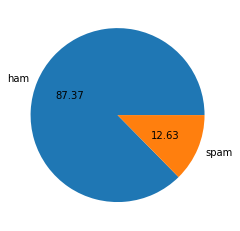

In [17]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
#counting no of chars and words
df['num_of_chars']=df['text'].apply(len)

In [19]:
df.head()

,target,text,num_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
from nltk.tokenize import word_tokenize
df['num_of_words']=df['text'].apply(lambda x: len(word_tokenize(x)))

In [21]:
from nltk.tokenize import sent_tokenize
df['num of sents'] = df['text'].apply(lambda x: len(sent_tokenize(x)))

In [22]:
#ham
df[df['target']== 0][['num_of_chars','num_of_words','num of sents']].describe()

,num_of_chars,num_of_words,num of sents
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#spam
df[df['target'] == 1][['num_of_chars','num_of_words','num of sents']].describe()

,num_of_chars,num_of_words,num of sents
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_of_chars', ylabel='Count'>

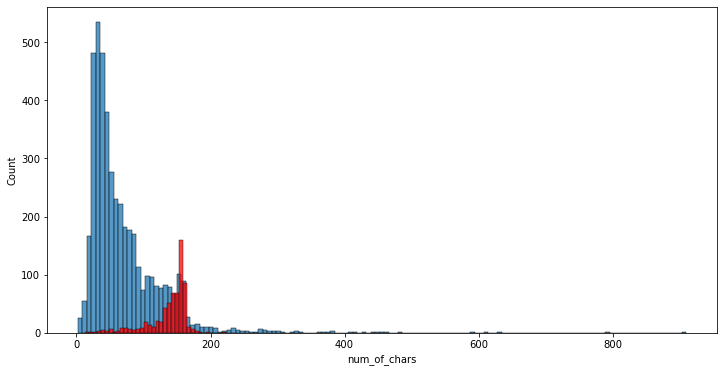

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_chars'])
sns.histplot(df[df['target'] == 1]['num_of_chars'],color ='red')

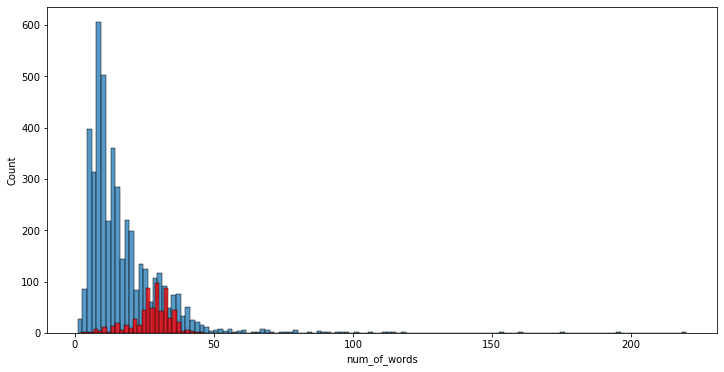

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_words'])
sns.histplot(df[df['target'] == 1]['num_of_words'],color ='red')
plt.show()

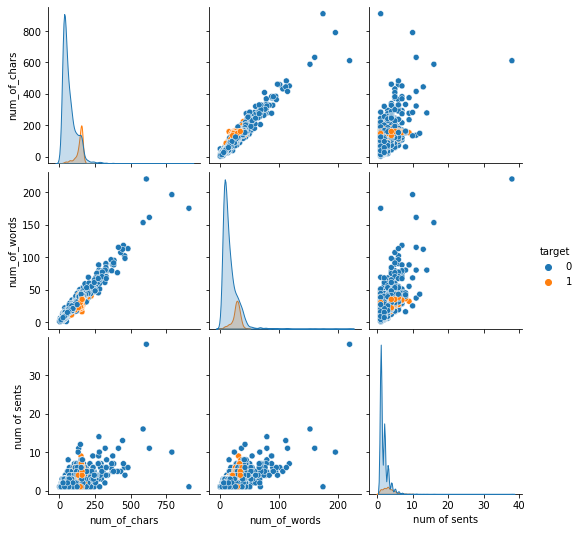

In [26]:
sns.pairplot(df,hue='target')
plt.show()

<AxesSubplot:>

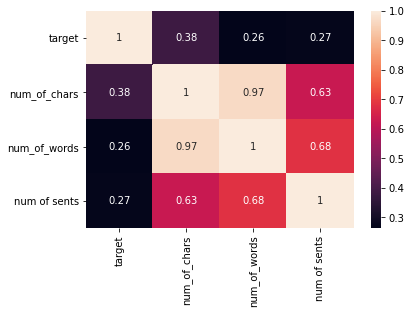

In [27]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing

In [28]:
#lower
df['text']=df['text'].str.lower()

In [29]:
df.head()

,target,text,num_of_chars,num_of_words,num of sents
0,0,"go until jurong point, crazy.. available only ...",111,24,2
1,0,ok lar... joking wif u oni...,29,8,2
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2
3,0,u dun say so early hor... u c already then say...,49,13,1
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1


In [30]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [31]:
def transform_text(text):
    text = text.lower()
    text = word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
      
    return " ".join(y)
    

In [32]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [33]:
df['transformed_text']=df['text'].apply(transform_text)

In [34]:
df.head()

,target,text,num_of_chars,num_of_words,num of sents,transformed_text
0,0,"go until jurong point, crazy.. available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar... joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
#wordcloud of spam

In [36]:
#!pip install wordcloud

In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [38]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

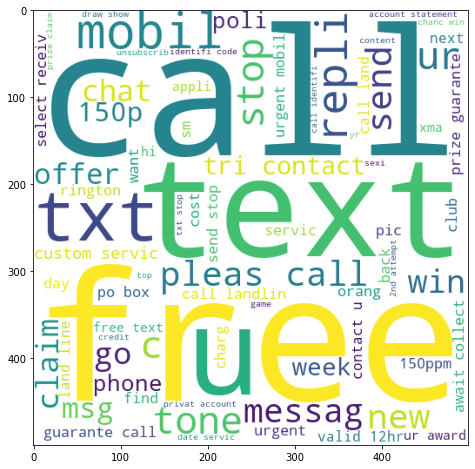

In [39]:
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)

In [40]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

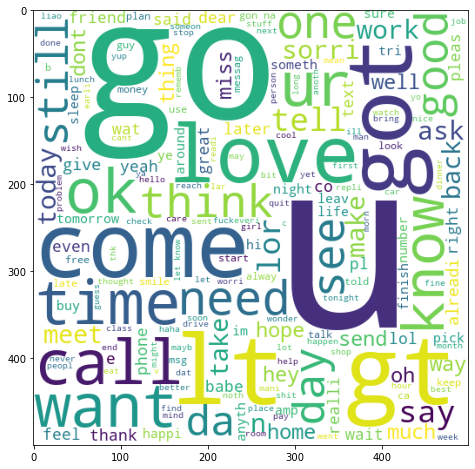

In [41]:
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)

###### getting top 30 words in spam and ham texts

In [42]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [43]:
len(ham_corpus)

35303

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


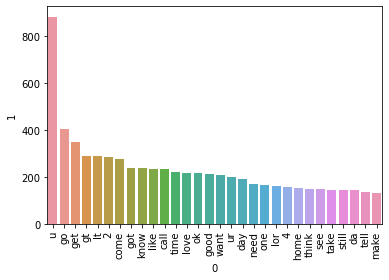

In [44]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [45]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [46]:
len(spam_corpus)

9941

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


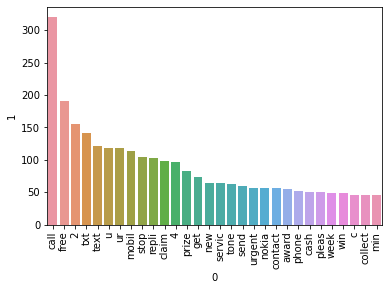

In [47]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## Model building

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [49]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [50]:
X.shape

(5169, 6677)

In [51]:
y = df['target'].values

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [53]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [54]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [55]:
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)

In [56]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)

In [57]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

###### GaussianNB model

In [59]:
print("accuracy_score",accuracy_score(y_test,y_pred_gnb))
print("confusion_matrix",confusion_matrix(y_test,y_pred_gnb))
print("precision_score",precision_score(y_test,y_pred_gnb))

accuracy_score 0.8781431334622823
confusion_matrix [[790 106]
 [ 20 118]]
precision_score 0.5267857142857143


In [60]:
#difference between accuracy and precision?
#what is confusion matrix?
#why differenent types of nb?
#minmax scalar?
#voting classifier?

###### Multinomial naive bayes

In [61]:
print("accuracy_score",accuracy_score(y_test,y_pred_mnb))
print("confusion_matrix",confusion_matrix(y_test,y_pred_mnb))
print("precision_score",precision_score(y_test,y_pred_mnb))

accuracy_score 0.965183752417795
confusion_matrix [[872  24]
 [ 12 126]]
precision_score 0.84


###### Bernoulli's naive bayes

In [62]:
print("accuracy_score",accuracy_score(y_test,y_pred_bnb))
print("confusion_matrix",confusion_matrix(y_test,y_pred_bnb))
print("precision_score",precision_score(y_test,y_pred_bnb))

accuracy_score 0.971953578336557
confusion_matrix [[894   2]
 [ 27 111]]
precision_score 0.9823008849557522


### Using tf-idf

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [64]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [65]:
y = df['target'].values

In [66]:
X.shape

(5169, 6677)

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)

In [70]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)

In [71]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)

###### GaussianNB model

In [72]:
print("accuracy_score",accuracy_score(y_test,y_pred_gnb))
print("confusion_matrix",confusion_matrix(y_test,y_pred_gnb))
print("precision_score",precision_score(y_test,y_pred_gnb))

accuracy_score 0.874274661508704
confusion_matrix [[791 105]
 [ 25 113]]
precision_score 0.518348623853211


###### Multinomial naive bayes

In [73]:
print("accuracy_score",accuracy_score(y_test,y_pred_mnb))
print("confusion_matrix",confusion_matrix(y_test,y_pred_mnb))
print("precision_score",precision_score(y_test,y_pred_mnb))

accuracy_score 0.9593810444874274
confusion_matrix [[896   0]
 [ 42  96]]
precision_score 1.0


###### Bernoulli's naive bayes

In [74]:
print("accuracy_score",accuracy_score(y_test,y_pred_bnb))
print("confusion_matrix",confusion_matrix(y_test,y_pred_bnb))
print("precision_score",precision_score(y_test,y_pred_bnb))

accuracy_score 0.971953578336557
confusion_matrix [[894   2]
 [ 27 111]]
precision_score 0.9823008849557522


In [75]:
#tf-idf --> mnb

### model improving